In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

sudoku_data = np.genfromtxt("datasets/minmax_rowcolumn_3by3.txt",delimiter=',',names=True)
data_p = pd.read_csv('datasets/minmax_rowcolumn_3by3.txt',sep =',')

Populating the interactive namespace from numpy and matplotlib


In [12]:
data_p.corr()

,givens,min,max,visits,propagations,conflicts,avg_level,seconds,assignments,restarts,min_row_col,max_row_col
givens,1.000000,0.703151,0.545016,-0.427570,-0.378284,-0.445859,NaN,-0.105666,-0.378399,NaN,0.448509,0.669572
min,0.703151,1.000000,0.132850,-0.323498,-0.273806,-0.331133,NaN,-0.084356,-0.273922,NaN,0.359230,0.425398
max,0.545016,0.132850,1.000000,-0.205676,-0.199352,-0.223823,NaN,-0.047116,-0.199374,NaN,0.193380,0.417754
visits,-0.427570,-0.323498,-0.205676,1.000000,0.974833,0.929442,NaN,0.122510,0.974894,NaN,-0.195423,-0.282515
propagations,-0.378284,-0.273806,-0.199352,0.974833,1.000000,0.930572,NaN,0.110447,0.999999,NaN,-0.169114,-0.256345
conflicts,-0.445859,-0.331133,-0.223823,0.929442,0.930572,1.000000,NaN,0.129522,0.930762,NaN,-0.201624,-0.298048
avg_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seconds,-0.105666,-0.084356,-0.047116,0.122510,0.110447,0.129522,NaN,1.000000,0.110495,NaN,-0.046176,-0.068171
assignments,-0.378399,-0.273922,-0.199374,0.974894,0.999999,0.930762,NaN,0.110495,1.000000,NaN,-0.169175,-0.256411
restarts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


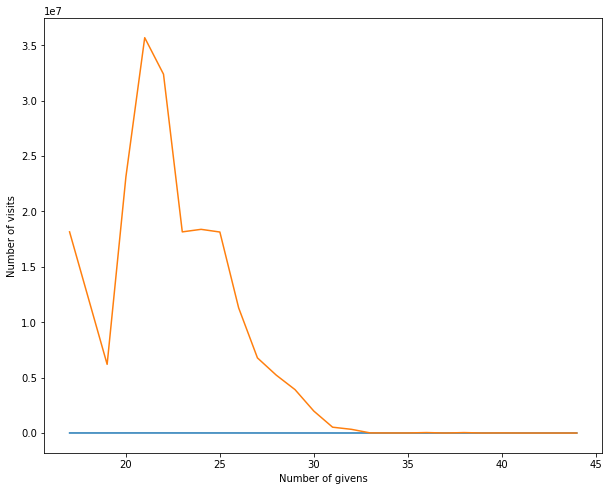

    givens        visits
0       17  1.815757e+07
1       19  6.200397e+06
2       20  2.313809e+07
3       21  3.568314e+07
4       22  3.238767e+07
5       23  1.815578e+07
6       24  1.838547e+07
7       25  1.814225e+07
8       26  1.129677e+07
9       27  6.781928e+06
10      28  5.227767e+06
11      29  3.918821e+06
12      30  1.983988e+06
13      31  5.268975e+05
14      32  3.353240e+05
15      33  1.223692e+04
16      34  7.063041e+03
17      35  6.971168e+03
18      36  4.321591e+04
19      37  6.811425e+02
20      38  4.159961e+04
21      39  3.625000e+02
22      40  1.136925e+04
23      41  8.320000e+02
24      42  8.829167e+02
25      44  1.913595e+02


In [13]:
data_p.corr()
var = data_p.groupby('givens')['visits'].var()
var_df = pd.DataFrame({'givens':var.index, 'visits':var.values})
means = data_p.groupby('givens')['visits'].mean()
means_df = pd.DataFrame({'givens':means.index, 'visits':means.values})
plt.plot(means_df['givens'],means_df['visits'])
plt.plot(var_df['givens'],var_df['visits'])
plt.xlabel('Number of givens')
plt.ylabel('Number of visits')
plt.show()
print(var_df)

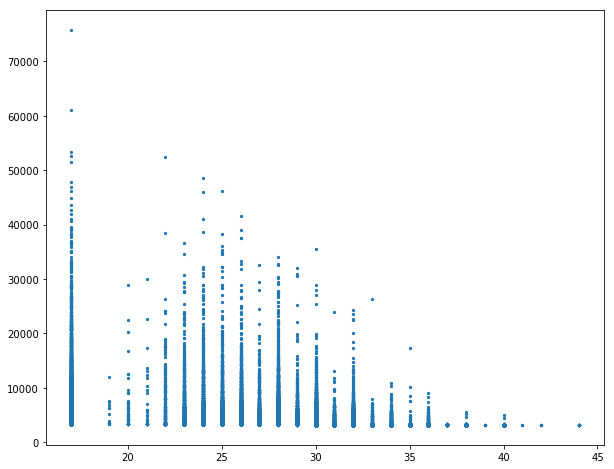

In [14]:
# givens = np.sort(sudoku_data ,order=["givens","visits"])
givens =sudoku_data 
plt.scatter(givens['givens'],givens['visits'],s=5)
plt.show()

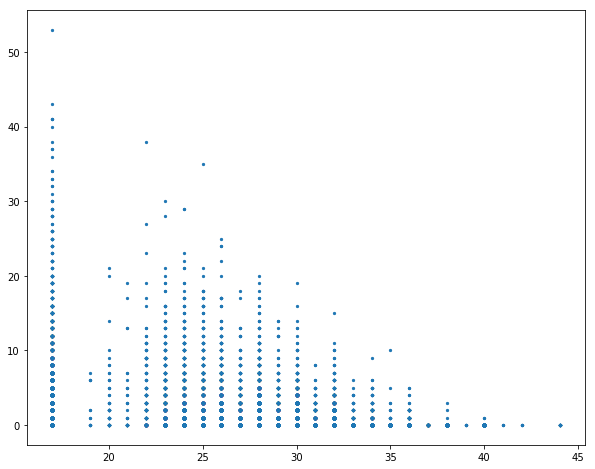

In [15]:
givens =sudoku_data 
plt.scatter(givens['givens'],givens['conflicts'],s=5)
plt.show()

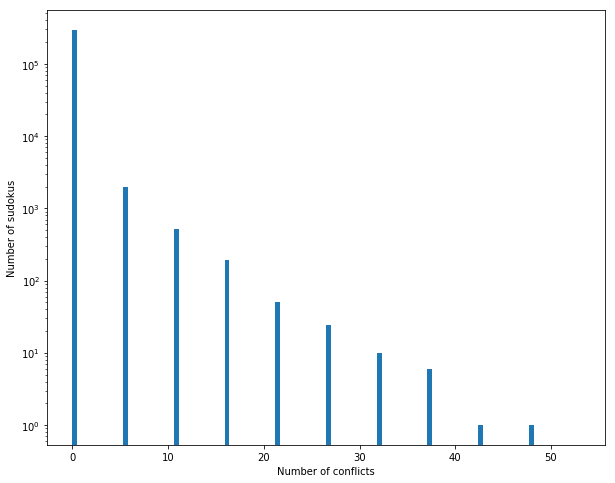

In [16]:
conflicts = sudoku_data
plt.hist(conflicts['conflicts'], width=0.5)
plt.yscale('log')
plt.xlabel('Number of conflicts')
plt.ylabel('Number of sudokus')
plt.savefig("3x3_conflicts.png")
plt.show()

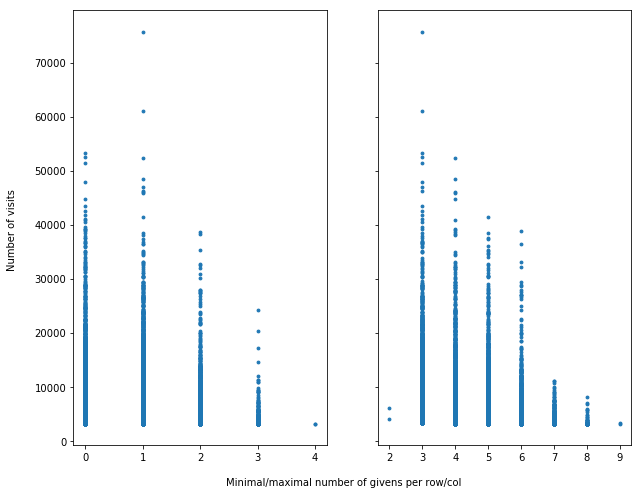

In [17]:
left_data = np.sort(sudoku_data ,order=["visits"])[1240:,]
middle_data = np.sort(sudoku_data ,order=["visits"])[:1240,]
fig, ((ax1,ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.scatter(sudoku_data['min_row_col'],sudoku_data['visits'],s=8)
ax2.scatter(sudoku_data['max_row_col'],sudoku_data['visits'],s=8)

# Set common labels
fig.text(0.5, 0.06, 'Minimal/maximal number of givens per row/col', ha='center', va='center')
fig.text(0.04, 0.5, 'Number of visits', ha='center', va='center', rotation='vertical')
plt.savefig("3x3_givens_max_min.png",dpi=300)
plt.show()

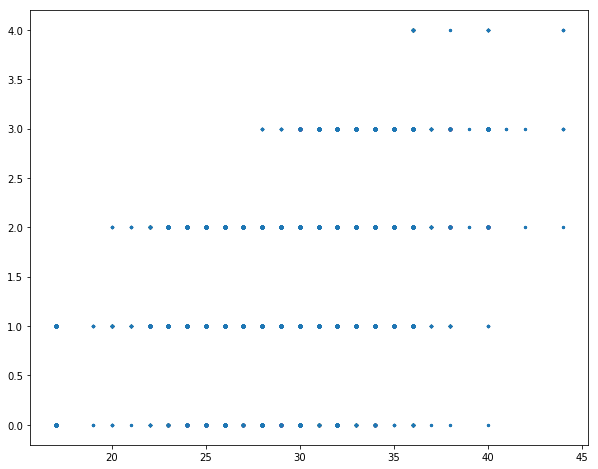

In [19]:
conflicts = np.sort(sudoku_data ,order=["givens","min"])
plt.scatter(conflicts['givens'],conflicts['min'],s=5)
plt.show()

(array([     0,      1,      2, ..., 299997, 299998, 299999]),)


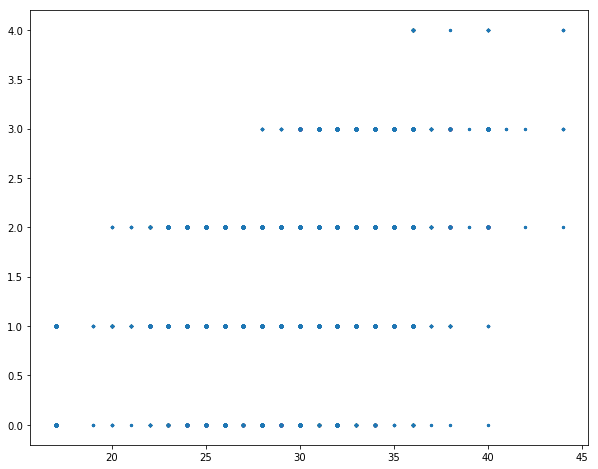

In [20]:
sudokus = np.sort(sudoku_data ,order=["givens","min"])
print(np.where(sudokus['min']  < 10 ))
plt.scatter(conflicts['givens'],conflicts['min'],s=5)
plt.show()

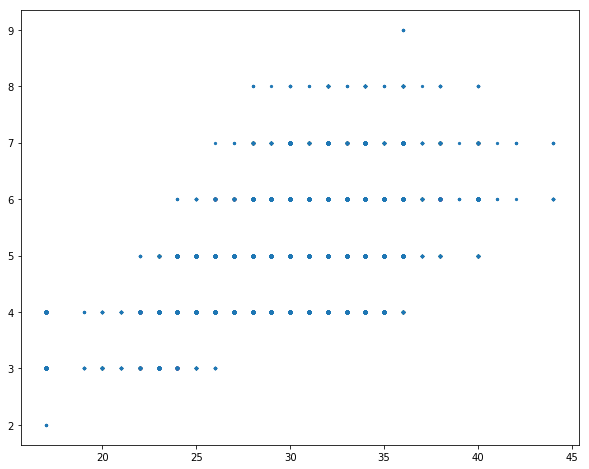

In [21]:
conflicts = np.sort(sudoku_data ,order=["givens","max"])
plt.scatter(conflicts['givens'],conflicts['max'],s=5)
plt.show()

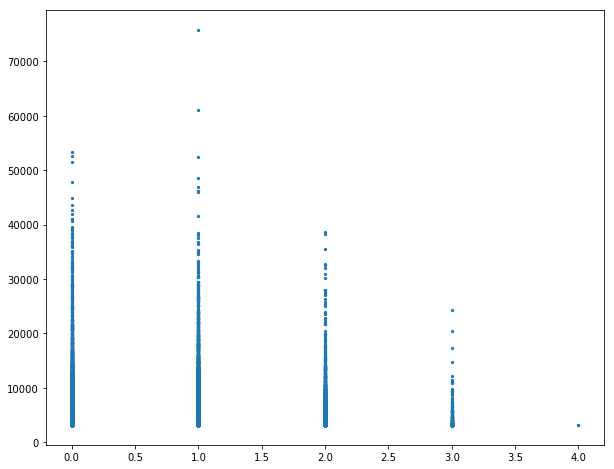

In [22]:
conflicts = np.sort(sudoku_data ,order=["visits"])
plt.scatter(conflicts['min_row_col'],conflicts['visits'],s=5)
plt.show()

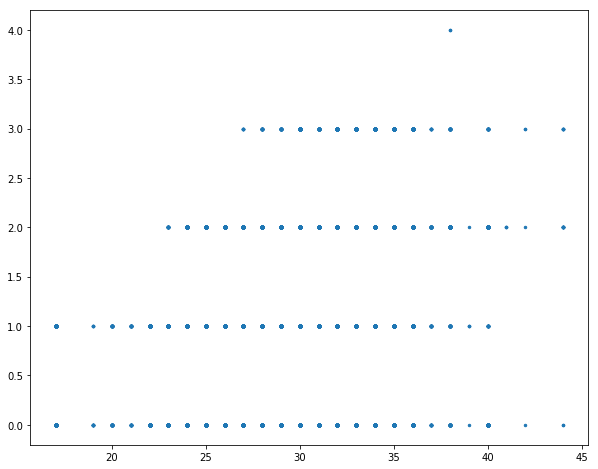

In [23]:
conflicts = np.sort(sudoku_data ,order=["visits"])
plt.scatter(conflicts['givens'],conflicts['min_row_col'],s=6)
plt.show()

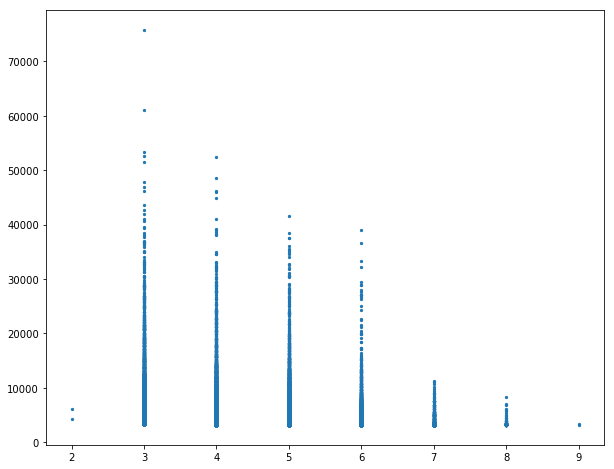

In [24]:
conflicts = np.sort(sudoku_data ,order=["visits"])
plt.scatter(conflicts['max_row_col'],conflicts['visits'],s=5)
plt.show()